# Installations

In [1]:
# May need to uncomment to install scikit-learn (sklearn)
#!pip install scikit-learn==0.23.1

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

# Load in Data

In [3]:
import csv

# name of file
filename = "iris.data"

# read in csv
pdf = pd.read_csv(filename, index_col=False)

dataframe = pdf.to_numpy()

pdf = pd.DataFrame(dataframe)
pdf.rename(columns={0: 'sepal_length', 1: 'sepal_width', 2 : 'petal_length', 3 : 'petal_width', 4 : 'class'}, inplace=True)

X = pdf[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = pdf[['class']]

# create array of features
features = pdf.columns

# create array of classes
classes = pdf['class'].unique()
classes
#X
#pdf

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Familiarizing Ourselves With The Data

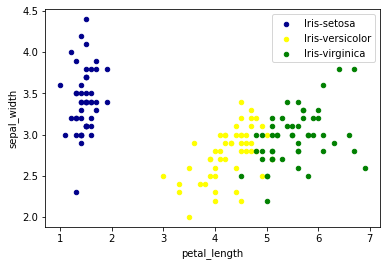

In [4]:
feature_x = features[2]
feature_y = features[1]
ax = pdf[pdf['class'] == classes[0]][0:50].plot(kind='scatter', x=feature_x, y=feature_y, color='DarkBlue', label=classes[0]);
pdf[pdf['class'] == classes[1]][0:50].plot(kind='scatter', x=feature_x, y=feature_y, color='Yellow', label=classes[1], ax=ax);
pdf[pdf['class'] == classes[2]][0:50].plot(kind='scatter', x=feature_x, y=feature_y, color='Green', label=classes[2], ax=ax);
plt.show()

In [5]:
pdf.dtypes

sepal_length    object
sepal_width     object
petal_length    object
petal_width     object
class           object
dtype: object

In [6]:

#pdf = pdf[pd.to_numeric(pdf[features[0]], errors='coerce').notnull()]
pdf[features[0]] = pdf[features[0]].astype('double')
pdf[features[1]] = pdf[features[1]].astype('double')
pdf[features[2]] = pdf[features[2]].astype('double')
pdf[features[3]] = pdf[features[3]].astype('double')
pdf.loc[pdf['class'] == 'Iris-setosa', 'class'] = 0
pdf.loc[pdf['class'] == 'Iris-versicolor', 'class'] = 1
pdf.loc[pdf['class'] == 'Iris-virginica', 'class'] = 2
pdf['class'] = pdf['class'].astype('int')

pdf.dtypes

pdf[features[0]]

#pdf.head(10)

0      4.9
1      4.7
2      4.6
3      5.0
4      5.4
      ... 
144    6.7
145    6.3
146    6.5
147    6.2
148    5.9
Name: sepal_length, Length: 149, dtype: float64

In [7]:
feature_df = pdf[[features[0], features[1], features[2], features[3]]]
X = np.asarray(feature_df)
X

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [8]:
#pdf['class'] = pdf['class'].astype('int')
y = np.asarray(pdf['class'])
y

print(X.shape)
print(y.shape)

(149, 4)
(149,)


# Splitting Data into Training and Testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (119, 4) (119,)
Test set: (30, 4) (30,)


In [10]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [11]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 0, 0, 0, 2])

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix, without normalization
[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


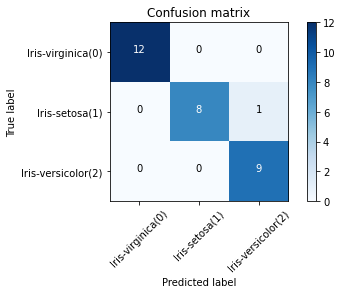

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Iris-virginica(0)','Iris-setosa(1)','Iris-versicolor(2)'],normalize= False,  title='Confusion matrix')